# Wine Quality Prediction Using Multiple Linear Regression Model

In this notebook, I will:
* Split the dataset into training and testing sets.
* Transform the data to have a Gaussian distribution using Yeo-Johnson.
* Build a multiple linear regression model to predict the quality of red wine. 
* Evaluate the model by calculating the Mean Squared Error, Mean Absolute Error, Root Mean Squared Error and Variance. 

In [2]:
# Installing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression

## Introduction

#### Dataset
This dataset is from University of California, Irvine: [Wine Quality Data Set](https://archive.ics.uci.edu/ml/datasets/wine+quality)

Citation: P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.  Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.


#### Context
The original dataset includes two datasets. One for red wine and one for white wine. I will be working with the red wine dataset in this notebook.
* This dataset includes 11 features that can be used to predict the quality of wine.
* I will train a machine learning model that will help with predicting wine quality. 

#### Attribute Information
Input features (based on physicochemical tests)
* fixed acidity (g/dm^3)
* volatile acidity (g/dm^3)
* citric acid (g/dm^3)
* residual sugar (g/dm^3)
* chlorides (sodium chloride - g/dm^3)
* free sulfur dioxide (mg/dm^3)
* total sulfur dioxide (mg/dm^3)
* density (g/cm^3)
* pH (value bewteen 0 and 14 | <6 = acidic, 7 = neutral, >7 = basic)
* sulphates (potassium sulphate - g/dm^3)
* alcohol (% by volume)

Output feature (based on sensory data)
* quality (score bewteen 0 and 10)

In [3]:
# Loading the dataset using pandas
wine_data = pd.read_csv('/Users/hannatuple/Desktop/Python/winequality-red.csv')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Quick description of the dataset
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Based on this description, the dataset doesn't contain any null values or categorical variables. 

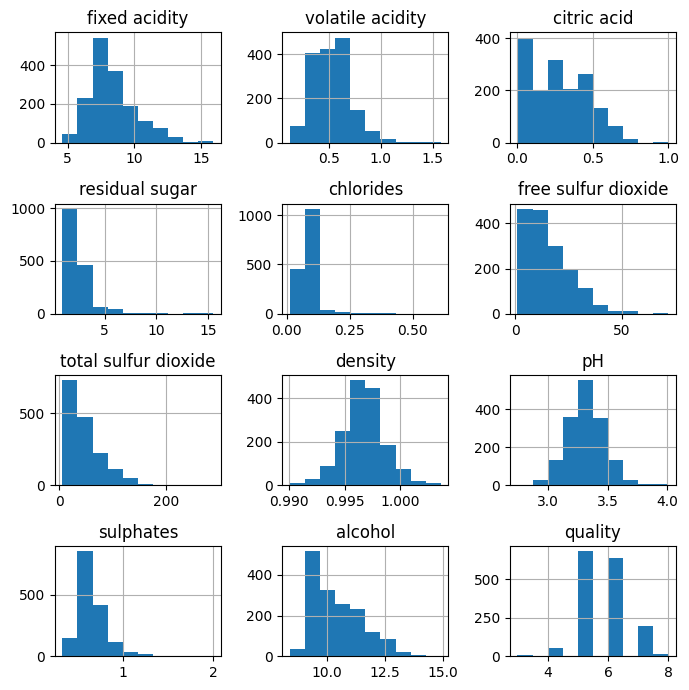

In [114]:
# A visual representation of the data
wine_data.hist(figsize=(7,7))
plt.tight_layout()
plt.show()

A couple of observations based on the histograms.
* Many of the histograms are skewed right.
* The attributes have different scales. 


## Transforming the Dataset
The linear regression model assumes that the data has a Gaussian distribution, however, the previous histograms display right-skewed data. To fix this, I will use the **Yeo-Johnson** function to transform the data to have a Gaussian distribution. 

In [115]:
# Transform the data to a Gaussian Distribution using Yeo-Johnson.
transformer = PowerTransformer(method='yeo-johnson', standardize=False)
fitted_data = transformer.fit_transform(wine_data)
fitted_data = pd.DataFrame(fitted_data, columns=[column for column in list(wine_data.columns)])
fitted_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.965601,0.434520,-0.000000,0.434345,0.040250,2.715988,3.710526,0.057393,1.165073,0.206762,0.268966,3.003746
1,0.972687,0.498508,-0.000000,0.454268,0.044648,3.662894,4.439253,0.057393,1.122948,0.217431,0.268972,3.003746
2,0.972687,0.457142,0.038972,0.447288,0.043614,3.062287,4.205195,0.057393,1.131425,0.215122,0.268972,3.003746
3,1.015099,0.224548,0.414036,0.434345,0.040006,3.206108,4.319267,0.057393,1.117206,0.208830,0.268972,3.422339
4,0.965601,0.434520,-0.000000,0.434345,0.040250,2.715988,3.710526,0.057393,1.165073,0.206762,0.268966,3.003746


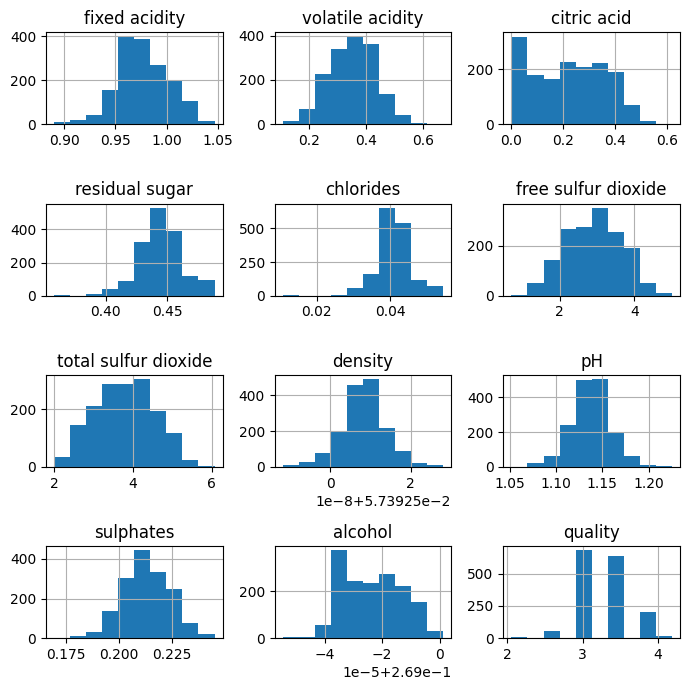

In [116]:
# Plotting new histograms.
fitted_data.hist(figsize=(7,7))
plt.tight_layout()
plt.show()

In [117]:
# Remove the target variable
features = [x for x in fitted_data.columns if not x in 'quality']

## Splitting the Dataset
To split the dataset, I will use the **sklearn** function, train_test_split.

In [118]:
x_train, x_test, y_train, y_test = train_test_split(fitted_data[features], fitted_data['quality'], train_size = 0.7)
print("x_train.shape", x_train.shape, "y_train.shape", y_train.shape)
print("x_test.shape", x_test.shape, "y_test.shape", y_test.shape)

x_train.shape (1119, 11) y_train.shape (1119,)
x_test.shape (480, 11) y_test.shape (480,)


## Model Creation
Since the dataset consists of numerical values, I will implement a multiple linear regression model.

In [119]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

## Model Prediction and Evaluation
Now that I built the model, I'll take the testing data to see how well the model performed.

In [120]:
# Predict the values of the test set.
y_predict = model.predict(x_test)
print(y_predict[:50].round())
print(y_test.iloc[:50].values.round())

[3. 3. 3. 3. 3. 3. 4. 3. 3. 4. 3. 3. 4. 3. 3. 3. 3. 3. 3. 3. 4. 3. 4. 3.
 3. 3. 3. 4. 3. 4. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3.]
[3. 3. 3. 3. 3. 3. 4. 3. 3. 4. 3. 3. 4. 4. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 4. 4. 3. 3. 3. 4. 4. 3. 4. 4. 3. 3. 3. 2. 3. 3. 3. 3. 4.
 3. 3.]


In [121]:
# Evaluate the model.
print(model.intercept_)
print(model.coef_)

457099.6827998195
[ 2.10657494e+00 -8.98589926e-01 -1.60973396e-01  5.75596861e-01
 -6.96988620e+00  3.09771951e-02 -3.89347518e-02 -8.00637857e+06
 -6.68526595e-01  7.14889634e+00  8.95002166e+03]


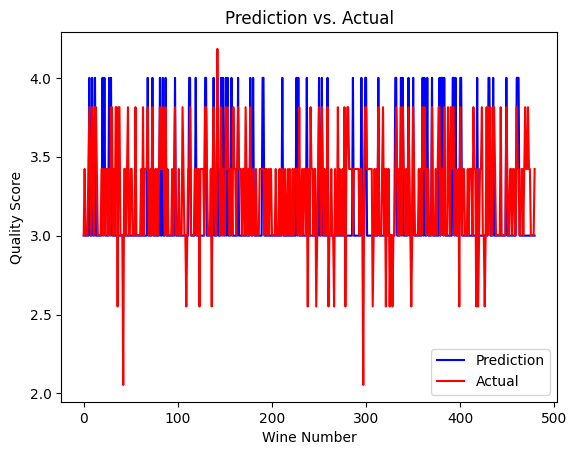

In [122]:
# Visualize the model.
fig, ax = plt.subplots()
ax.plot(y_predict.round(0), color='b', label='Prediction')
ax.plot(y_test.values, color='r', label='Actual')
ax.set_title("Prediction vs. Actual")
ax.set_xlabel("Wine Number")
ax.set_ylabel("Quality Score")
plt.legend()
plt.show()

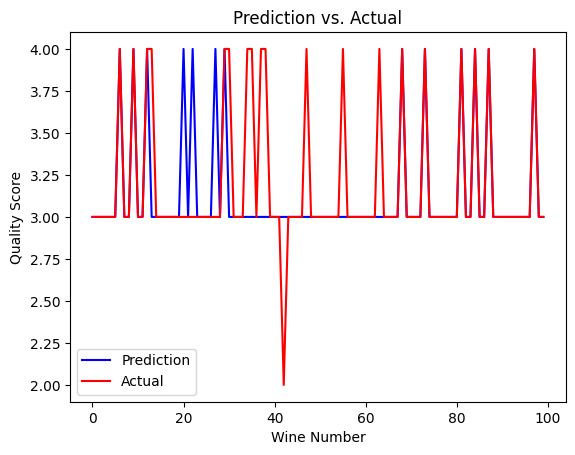

In [123]:
# Visualize the first 100 values to get a better look.
fig, ax = plt.subplots()
ax.plot(y_predict[:100].round(0), color='b', label='Prediction')
ax.plot(y_test.iloc[:100].values.round(), color='r', label='Actual')
ax.set_title("Prediction vs. Actual")
ax.set_xlabel("Wine Number")
ax.set_ylabel("Quality Score")
plt.legend()
plt.show()

In [124]:
# Comparing the prediction values with the actual values in a dataframe.
predict_df = pd.DataFrame({'Actual': y_test.round(), 'Predicted': y_predict.round()})
predict_df.head(10)

,Actual,Predicted
542,3.0,3.0
1185,3.0,3.0
203,3.0,3.0
1415,3.0,3.0
871,3.0,3.0
1199,3.0,3.0
821,4.0,4.0
1380,3.0,3.0
969,3.0,3.0
1156,4.0,4.0


Based on the plot and dataframe comparison, the model seems to perform decently. Some of the predicted values are close if not the same for a small sample. To determine how well the model performed overall, I will use the mean squared error, root mean squared error and mean absolute error.

In [125]:
# Calculating MSE, MAE, RMSE.
from sklearn import metrics

print("MSE:", metrics.mean_squared_error(y_test, y_predict).round(2))
print("MAE:", metrics.mean_absolute_error(y_test, y_predict).round(2))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_predict)).round(2))

MSE: 0.06
MAE: 0.2
RMSE: 0.25


In [128]:
# Calculating Variance.
print("Variance:", metrics.explained_variance_score(y_test, y_predict).round(2))

Variance: 0.42


The calculated error values indicate that the model is relatively accurate. The RMSE is higher than the MSE since it's more sensitized towards outliers and larger errors. Based on the difference, the dataset seems to contain outliers that skew the model's accuracy. The variance score is quite low, which means that the model doesn't explain the variance in the data well. The goal for the model is to have error values closer to 0 and the variance closer to 1. My model has error values that are close to 0 but not close enough to say that this would be the best model for this data. Perhaps feature scaling or removing the outliers would improve the algorithm. Alternatively, a different algorithm may fit the data much better.